In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Example dataset (IMDb has 50k reviews)
from tensorflow.keras.datasets import imdb

# Load IMDb dataset (top 10,000 words only)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to fixed length
max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))   # Binary classification

# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and store history
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

# Evaluate
loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", acc)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 220s 690ms/step - accuracy: 0.6860 - loss: 0.5700 - val_accuracy: 0.8426 - val_loss: 0.3776
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 264s 694ms/step - accuracy: 0.8464 - loss: 0.3755 - val_accuracy: 0.8504 - val_loss: 0.3582
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 263s 700ms/step - accuracy: 0.8942 - loss: 0.2707 - val_accuracy: 0.8312 - val_loss: 0.3841
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.8303 - loss: 0.3866
Test Accuracy: 0.8318799734115601


In [2]:
y_pred = model.predict(x_test, batch_size = 128)
y_pred = (y_pred > 0.5).astype('int32') # Convert probabilities to binary predictions

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

196/196 ━━━━━━━━━━━━━━━━━━━━ 64s 323ms/step
Correct Prediction: 20797
Wrong Prediction: 4203
Accuracy: 83.18799999999999


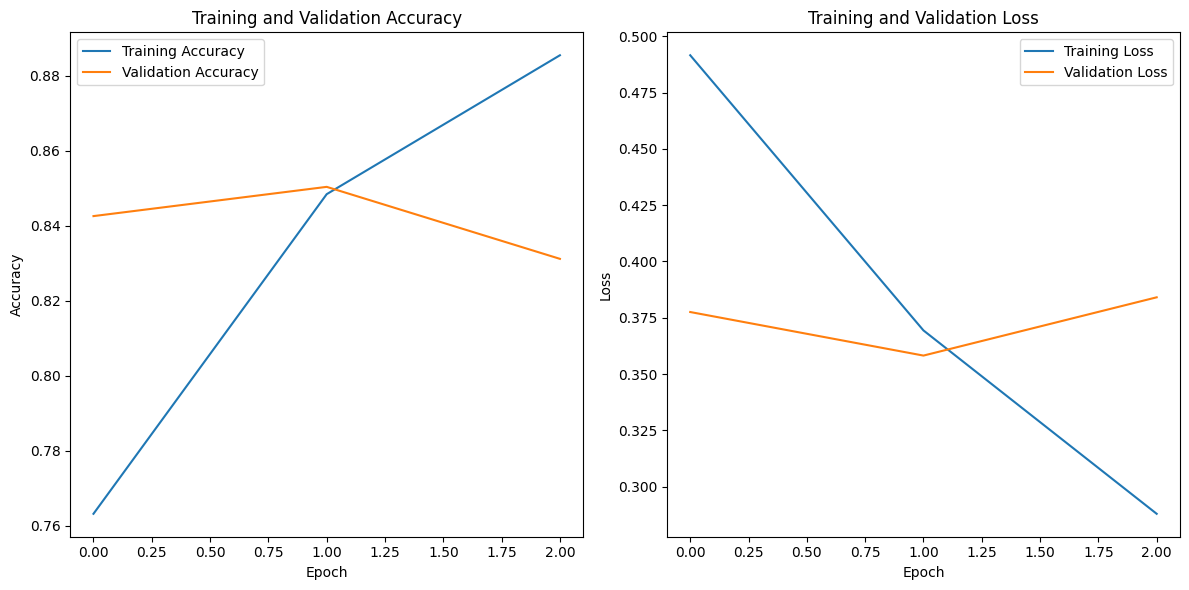

In [3]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
# Example predictions
example_reviews = [
    "This movie was fantastic! I loved every minute of it.",
    "The plot was confusing and the acting was terrible.",
    "It was an okay movie, nothing special but not bad either."
]

word_index = imdb.get_word_index()

num_words = 10000
word_index = {k:(v+3) for k,v in word_index.items()}
word_index[""] = 0
word_index[""] = 1
word_index[""] = 2
word_index[""] = 3

tokenizer = Tokenizer(num_words=num_words)

def encode_text(text):
    tokens = [word_index.get(word, word_index[""]) for word in text.lower().split()]
    return pad_sequences([tokens], maxlen=max_len)[0]

example_sequences = [encode_text(review) for review in example_reviews]
example_padded_sequences = pad_sequences(example_sequences, maxlen=max_len)

# Make predictions
predictions = model.predict(example_padded_sequences)

# Convert probabilities to binary predictions
predicted_sentiments = (predictions > 0.5).astype('int32')

# Map predictions to sentiment labels
sentiment_labels = {0: "Negative", 1: "Positive"}

print("Predictions:")
for i, review in enumerate(example_reviews):
    sentiment = sentiment_labels[predicted_sentiments[i][0]]
    print(f"Review: '{review}'\nPredicted Sentiment: {sentiment}\n")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Predictions:
Review: 'This movie was fantastic! I loved every minute of it.'
Predicted Sentiment: Positive

Review: 'The plot was confusing and the acting was terrible.'
Predicted Sentiment: Negative

Review: 'It was an okay movie, nothing special but not bad either.'
Predicted Sentiment: Negative

